In [18]:
# Zomato Data Analysis Using Python..

In [ ]:
For that we should import libraries for anaylsis like numpy, pandas, seaborn, matplot libraries.. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# we should upload the data excel file in the from of file read_method using pandas..

In [ ]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

In [ ]:
# First check data types in the file 'rate' coloumn convert them into float and remove the denominator.   

In [50]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())
               

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [51]:
# Check if there any Null Value if it is there change into non-null values..

In [52]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [53]:
# Check the which category have more customer is visit to restaurents...

Text(0.5, 0, 'Type of restaurant')

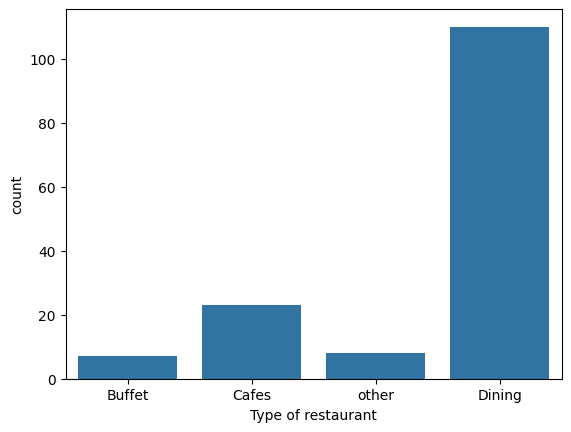

In [54]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

In [55]:
# To get graph grouped the data listed_in(type) and votes sum this to, apply dictionary form to get vote and grouped data..

Text(0, 0.5, 'Votes')

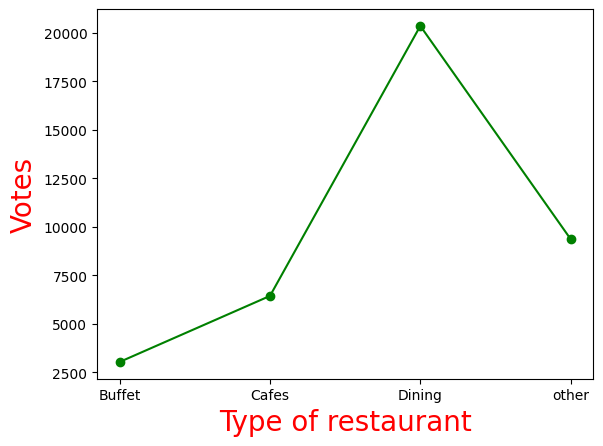

In [56]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'vote':grouped_data})
plt.plot(result, c="green",marker='o')
plt.xlabel("Type of restaurant", c="red",size=20)
plt.ylabel("Votes", c="red", size=20)

In [57]:
# To see the max_vote using max function and restaurant name..

In [58]:
max_votes = dataframe["votes"].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes']==max_votes, 'name']
print("Restaurant(s) with the maximum votes: ")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


In [59]:
# This show the max online order not accept are not by customer...

<Axes: xlabel='online_order', ylabel='count'>

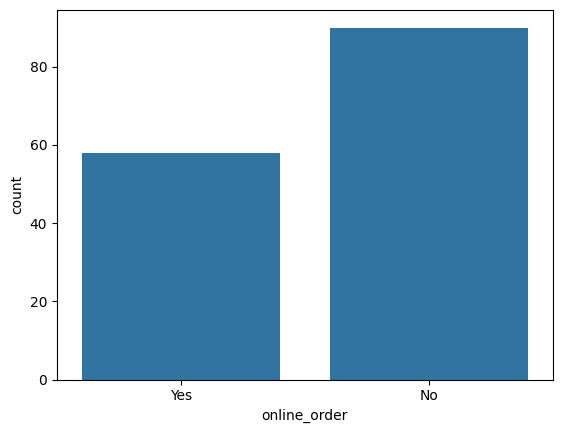

In [60]:
sns.countplot(x=dataframe['online_order'])

In [61]:
# this show the histplot graph using restaurant rating value..

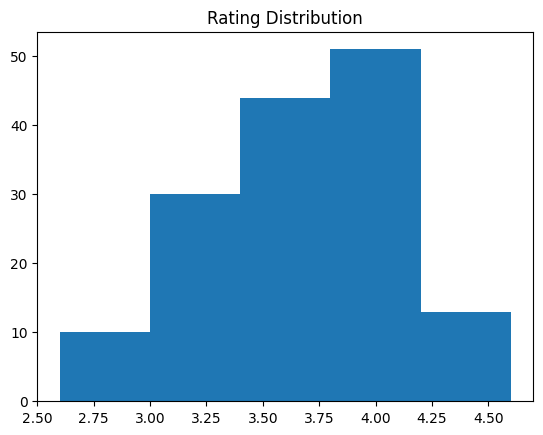

In [62]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution")
plt.show()

In [63]:
# This show prefer restaurant with maximum cost..

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

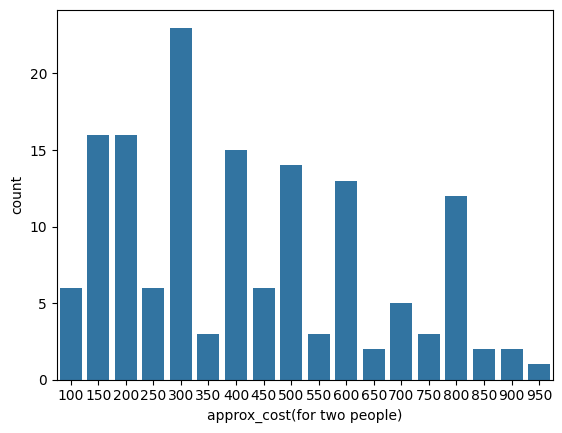

In [64]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [65]:
# This graph show offline and online order lower rating to excellent rating..

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

In [ ]:
# This show heatmap and pivot table..

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()